![S Legend](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSTwIpP7v3ycNMnjghyjhgmuA91On6Ylqd3BA&s)

# Team S Legend

### Feature Engineering Introduction

This notebook aims to evaluate what features should be used within the model. This includes inspecting what transformations could be made to better estimate Life Expectancy as well as what features benefit accuracy without making the model unstable.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('Life Expectancy Data.csv')

In [25]:
raw_data.Region = raw_data.Region.astype('category')

raw_data.Country = raw_data.Country.astype('category')

raw_data=raw_data.sort_values(by=['Country', 'Year']).reset_index(drop=True)

In [26]:
raw_data.head()

Country Region  Year  Infant_deaths  Under_five_deaths  \
0  Afghanistan   Asia  2000           90.5              129.2   
1  Afghanistan   Asia  2001           87.9              125.2   
2  Afghanistan   Asia  2002           85.3              121.1   
3  Afghanistan   Asia  2003           82.7              116.9   
4  Afghanistan   Asia  2004           80.0              112.6   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         310.8305                 0.02           62       12  21.7  ...   
1         304.8580                 0.02           63       13  21.8  ...   
2         298.8855                 0.02           64       14  21.9  ...   
3         292.0365                 0.02           65       15  22.0  ...   
4         285.1880                 0.02           67       16  22.1  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          24           0.02             148           20.78   
1          33           0.02             163           21.61   
2          36           0.02             320           22.60   
3          41           0.02             332           23.68   
4          50           0.02             323           24.73   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          2.3                       2.5        2.2   
1                          2.1                       2.4        2.2   
2                         19.9                       2.2        2.3   
3                         19.7                      19.9        2.4   
4                         19.5                      19.7        2.5   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             55.8  
1                         0                          1             56.3  
2                         0                          1             56.8  
3                         0                          1             57.3  
4                         0                          1             57.8  

[5 rows x 21 columns]

In [48]:
data_fe = raw_data.copy()
data_fe = data_fe.drop(columns=['Country', 'Region', 'Life_expectancy', 'Economy_status_Developed', 'Economy_status_Developing', 'Measles'])

One addition to the model we decided to remove straight away was Country and Region. These columns, whilst may providing insight to life expectancy, act as a bias to the model. For example, in general we have found that African countries tend to have less favourable metrics however have the highest variance. This implies that alot of African countries will have more favourable metrics that imply a greater life expectancy. So for this reason, we have removed country and region on the grounds to make our model not only more ethical but a better representation of how a country has developed impacting life expactancy through metrics directly correlated to life expectancy rather than past performance. 
This is similar to the reason we also removed measles.

Further, economic status will be removed since this is already incapsulated within GDP and economic status is somewhat arbitrary.

First let's get a feel on how different features influence Life Expectancy...

Before this, we should split the data so there is no data leakage with what assumptions are made about the dataset compared to how we will test the model as well as scaling the data through StandardScaler as is common practise for Linear Regression Models.

In [49]:
scaler = StandardScaler()
data_col = data_fe.columns
data_fe = scaler.fit_transform(data_fe)

data_fe = pd.DataFrame(data_fe, columns=data_col)
data_fe['Life_expectancy'] = raw_data['Life_expectancy'].values

train_data, test_data = train_test_split(data_fe, test_size=0.2, random_state=42)

In [50]:
train_data

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
2026  0.542326      -0.303770          -0.375616        -0.355450   
651   0.759257       1.544900           1.350062         1.953628   
2225 -1.410048      -0.717814          -0.689784        -0.366844   
2357 -0.542326       0.691388           0.804757         2.753557   
670   1.410048      -0.946628          -0.851356        -0.865076   
...        ...            ...                ...              ...   
1638 -0.325396      -0.884884          -0.808718        -1.161576   
1095 -0.108465       1.893569           2.003082         0.905445   
1130  0.542326       2.623593           3.605337         0.608879   
1294  1.410048      -0.993843          -0.882772        -1.222696   
860   0.976187      -0.993843          -0.876040        -0.514968   

      Alcohol_consumption  Hepatitis_B       BMI     Polio  Diphtheria  \
2026             0.363985     0.294347  0.440877  0.165831    0.175666   
651             -0.924553    -1.393922 -0.698842 -1.890182   -1.562736   
2225             1.099935    -0.080824  0.121756  0.431122    0.433206   
2357             0.590045    -0.330938  0.714410 -0.762691   -0.468187   
670              1.175288     0.669517  0.942354  0.563768    0.561977   
...                   ...          ...       ...       ...         ...   
1638             0.861316     0.106761  0.942354 -0.232107   -0.081875   
1095            -0.402105    -0.080824 -1.017964 -0.696368   -0.790113   
1130            -0.638211    -1.518979 -0.197366 -1.359598   -1.305195   
1294             0.688004     0.669517  0.258522  0.563768    0.561977   
860              3.049070     0.606989  0.532055  0.497445    0.497592   

      Incidents_HIV  GDP_per_capita  Population_mln  \
2026      -0.312598       -0.400070       -0.222962   
651        0.111598       -0.589536       -0.114654   
2225      -0.371398       -0.479684       -0.213802   
2357       4.424960       -0.351582        0.082104   
670       -0.367198        0.000182       -0.237692   
...             ...             ...             ...   
1638      -0.341998        0.412305       -0.265758   
1095       0.804592       -0.648183       -0.258430   
1130       0.002399       -0.605010       -0.195849   
1294      -0.346198        1.089018        0.176709   
860       -0.341998        0.278533       -0.259090   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
2026                    -0.623296                 -0.640927   0.021406   
651                      0.278120                  0.243163  -1.019275   
2225                    -0.465548                 -0.464109   0.620585   
2357                     1.517569                  1.989241   0.399835   
670                     -0.758509                 -0.751438   1.093622   
...                           ...                       ...        ...   
1638                    -0.938792                 -0.928256   0.683657   
1095                     0.864041                  0.817822  -1.681526   
1130                    -0.195123                 -0.198882  -0.924668   
1294                    -0.961328                 -0.950358   0.778264   
860                     -0.668367                 -0.663029   1.535123   

      Life_expectancy  
2026             72.7  
651              53.6  
2225             72.2  
2357             53.4  
670              77.5  
...               ...  
1638             79.4  
1095             53.1  
1130             60.5  
1294             83.1  
860              76.3  

[2291 rows x 16 columns]

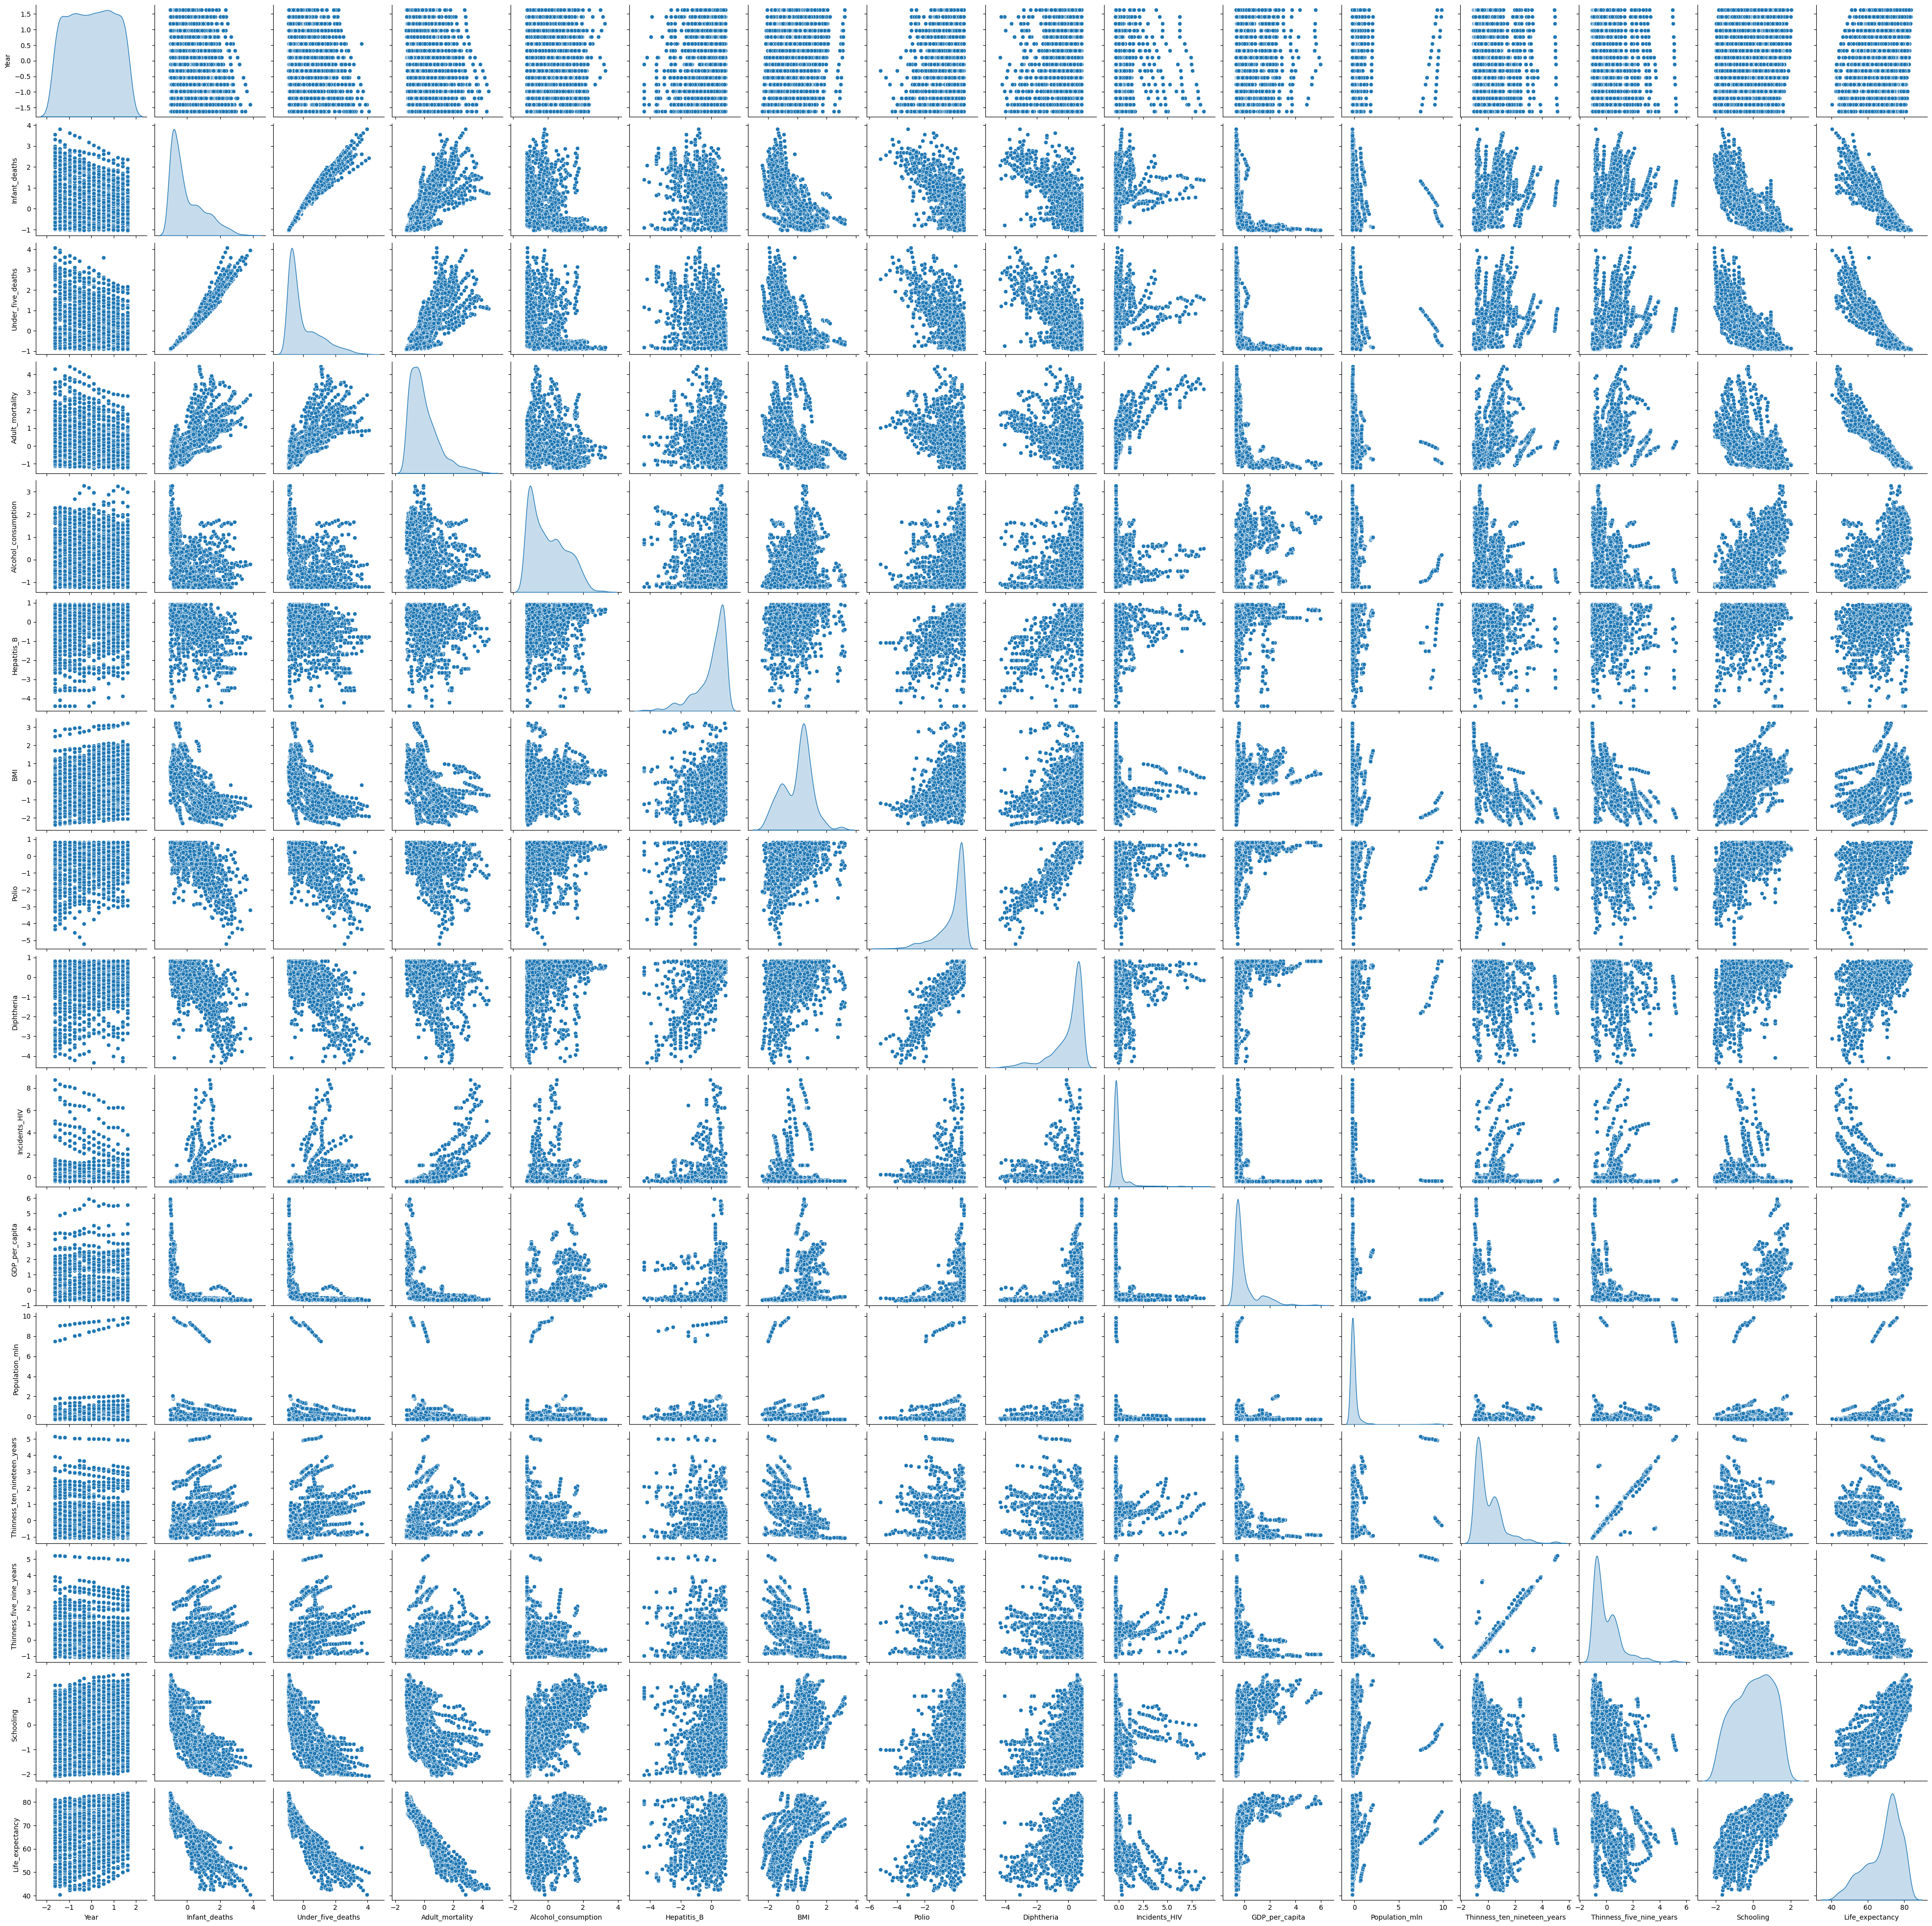

In [51]:
sns.pairplot(train_data, diag_kind='kde')

The next thing to note with this dataset is that some features seem to follow a log-like relationship with Life Expectancy like GDP per cap. We can look at the difference in correlation as they are and when the dataset is transformed logarthmically.

(Using $log(1+x)$ since some columns are less than 1)

c:\Python\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Absolute Correlation')

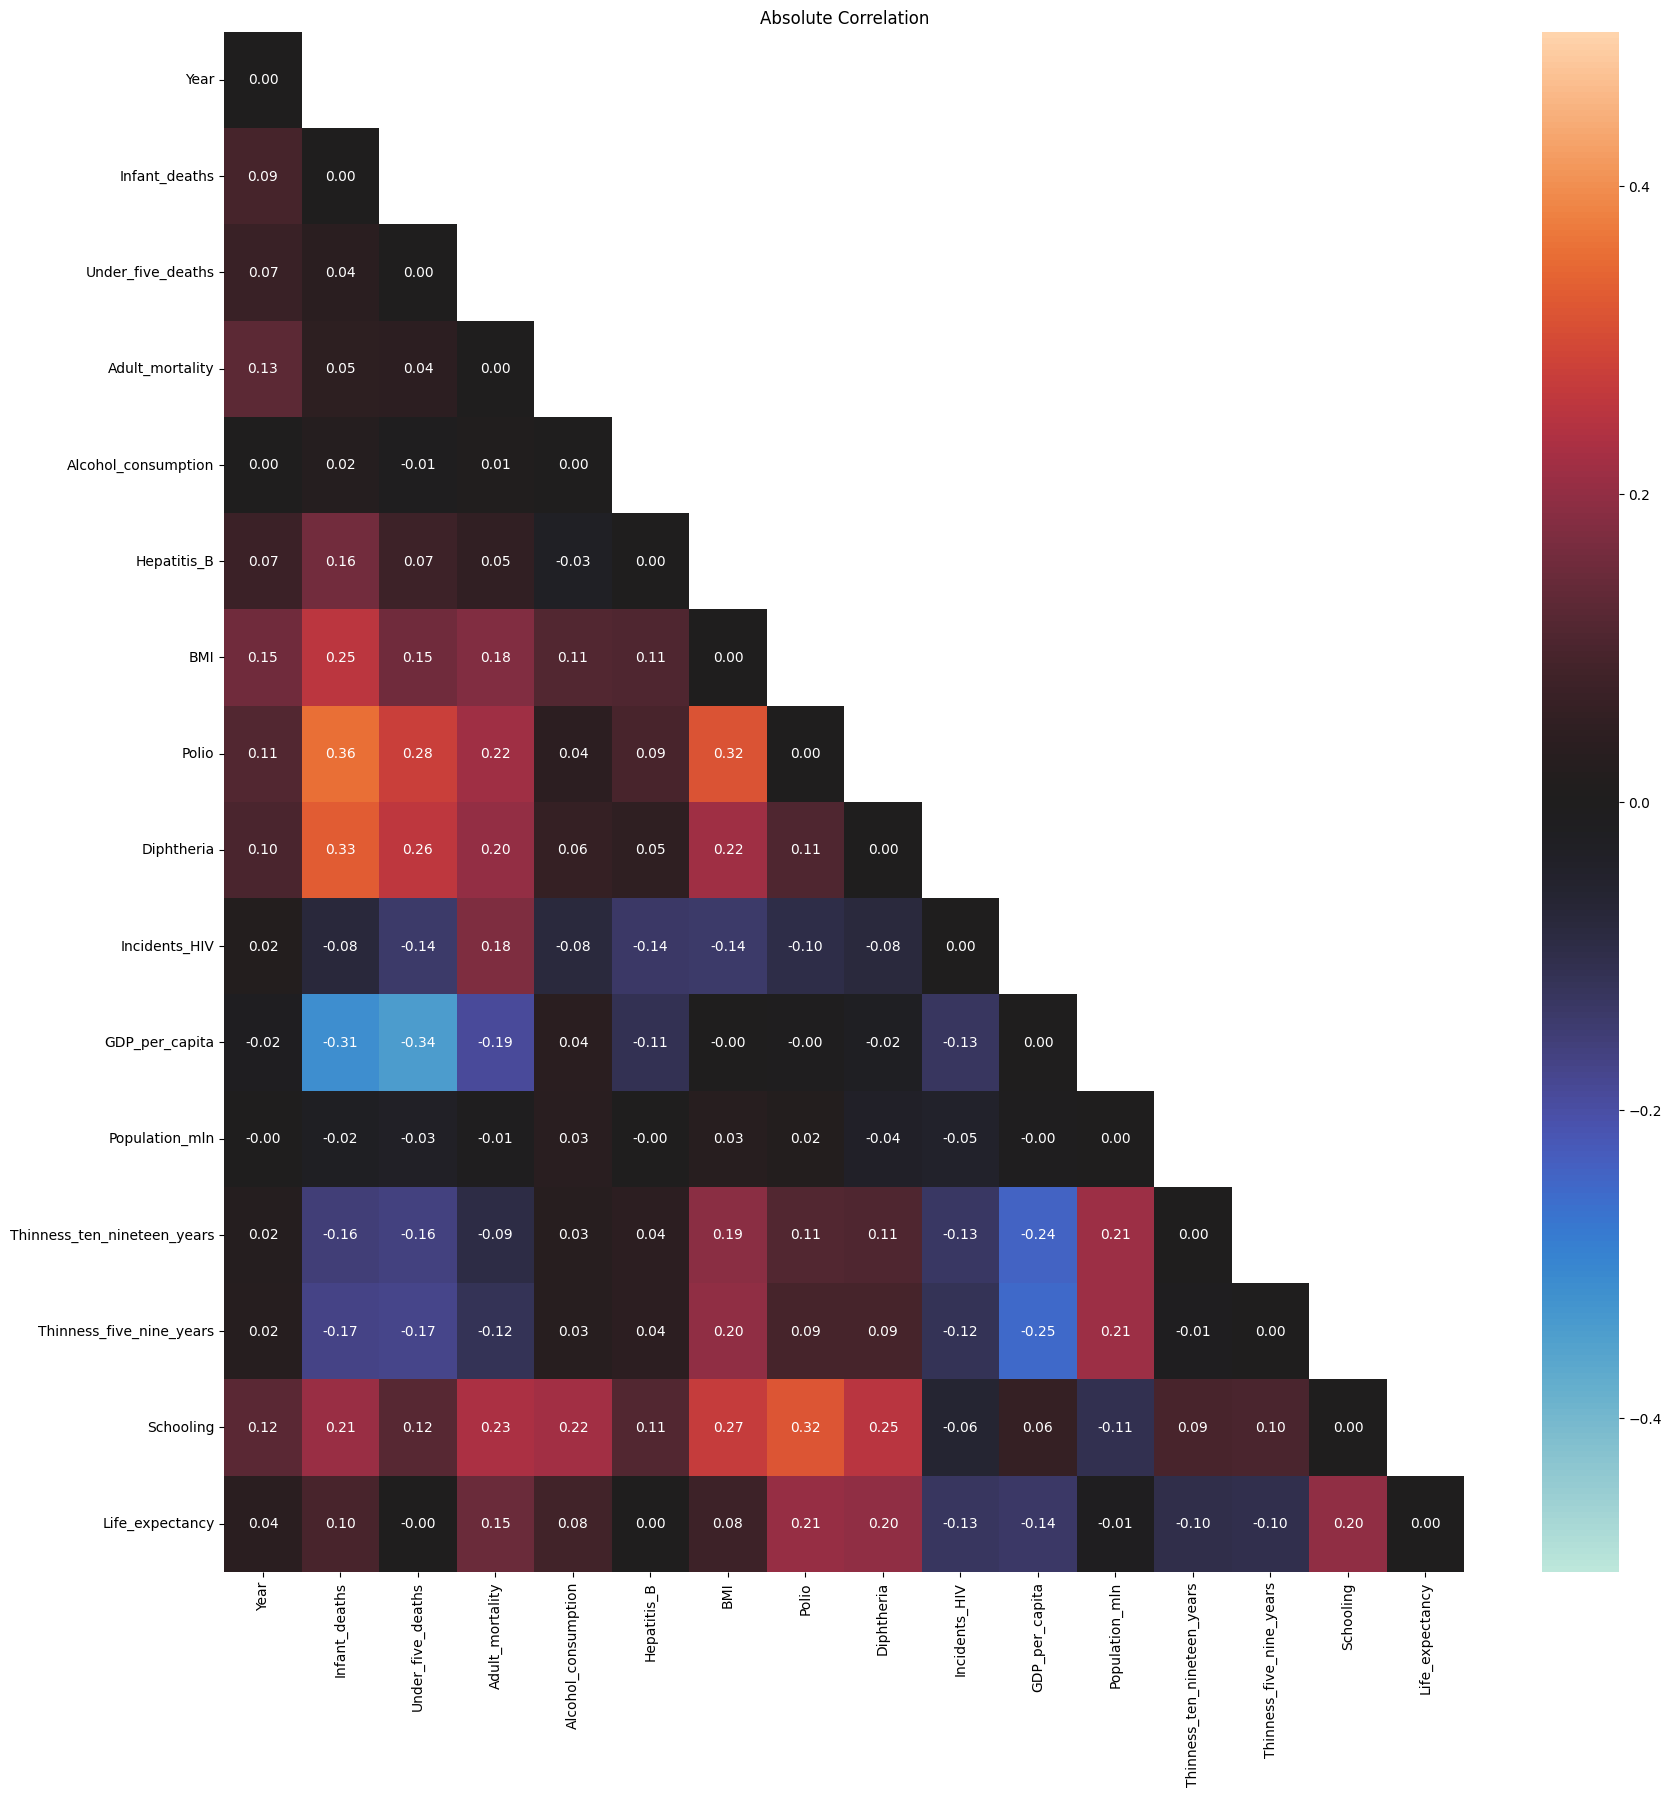

In [52]:
non_transformed_corr = train_data.corr()

log_data = train_data.copy()
for col in log_data.columns:
    if col == 'Life_expectancy':
        continue
    log_data[col] = np.log1p(log_data[col])


log_data_corr = log_data.corr()

abscorr = non_transformed_corr.abs()
abslogcorr = log_data_corr.abs()
diffcorr = abscorr - abslogcorr

matrix = np.triu(diffcorr)
plt.figure(figsize=(20, 20))
sns.heatmap(diffcorr,
            vmin = -0.5, vmax = 0.5, center = 0,
            annot = True, fmt = '.2f', mask=matrix)
plt.title('Absolute Correlation')

The key metrics to look at her are ones that are below 0. Since _diffcorr_ is calculated as _abscorr - abslogcorr_ where the transformed features have postively impacted correlation, the difference will be negative.

From this we can see that both _Incidents_HIV_ and _GDP_per_capita_ are significant enough to transform.

In [61]:
def feat_engV1(data, transform_cols):
    '''
    First version of feature engineering function from what insights we have so far.
    '''
    data = data.drop(columns=['Country', 'Region', 'Economy_status_Developed', 'Economy_status_Developing', 'Measles'])

    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    data = pd.DataFrame(data_scaled, index=data.index, columns=data.columns)

    data[transform_cols] = np.log1p(data[transform_cols])
    return data

Leading on from this, our next focus was in feature selection to reduce Multi-Colinearity and making our model more stable.

This started by setting a benchmark model using all features and whatever transformations we have made...

In [62]:
X = raw_data.drop(columns=['Life_expectancy'])
y = raw_data['Life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_fe = feat_engV1(X_train, ['GDP_per_capita', 'Incidents_HIV'])

lin_reg = sm.OLS(y_train, X_train_fe)

lin_reg_result = lin_reg.fit()
lin_reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life_expectancy   R-squared (uncentered):                   0.435
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              116.8
Date:                Mon, 14 Jul 2025   Prob (F-statistic):                   1.17e-268
Time:                        12:38:26   Log-Likelihood:                         -12316.
No. Observations:                2291   AIC:                                  2.466e+04
Df Residuals:                    2276   BIC:                                  2.475e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Year                           -0.9660      1.141     -0.847      0.397      -3.203       1.271
Infant_deaths                 -57.2755      7.218     -7.935      0.000     -71.430     -43.121
Under_five_deaths              48.4402      7.243      6.688      0.000      34.236      62.644
Adult_mortality                18.4941      3.253      5.686      0.000      12.116      24.873
Alcohol_consumption             8.5332      1.553      5.493      0.000       5.487      11.579
Hepatitis_B                    -1.7616      1.747     -1.009      0.313      -5.187       1.663
BMI                             6.5174      1.755      3.713      0.000       3.075       9.960
Polio                          -1.9686      3.760     -0.524      0.601      -9.341       5.404
Diphtheria                      5.0233      3.925      1.280      0.201      -2.674      12.720
Incidents_HIV                 -77.0185      4.318    -17.835      0.000     -85.487     -68.550
GDP_per_capita                -48.9891      2.464    -19.881      0.000     -53.821     -44.157
Population_mln                 -1.5224      1.173     -1.297      0.195      -3.824       0.779
Thinness_ten_nineteen_years     6.3252      3.303      1.915      0.056      -0.152      12.803
Thinness_five_nine_years       -2.9238      3.298     -0.887      0.375      -9.391       3.543
Schooling                      15.0900      2.240      6.737      0.000      10.698      19.482
==============================================================================
Omnibus:                       54.041   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.419
Skew:                           0.387   Prob(JB):                     3.40e-13
Kurtosis:                       3.052   Cond. No.                         23.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
import statsmodels.tools.eval_measures

y_pred = lin_reg_result.predict(X_train_fe)

rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)

print(rmse)

52.299035332270265


This is quite obviously pretty rubbish with very high RMSE and high instability.

From what we have found through some research is that we should be aiming for $VIF < 10$ as well as keeping correlation values high, e.g $90  percent$.

To automaticaly choose these features for us, we wrote a function that would pick features according to these conditions in <pre> ```def feature_engineeringV2 ``` </pre>

In [ ]:
def feature_engineeringV2(X):

    '''
    This function inputs a dataframe df and returns a feature engineered version of the dataframe.
    It performs the following steps:
    1. Drops the columns 'Country', 'Region', 'Life_expectancy', 'Economy_status_Developed', 'Economy_status_Developing', and 'Measles'.
    2. Creates a dataframe X and series y for feature engineering.
    3. Removes highly correlated features with a correlation greater than 0.9.
    4. Scales the features using StandardScaler.
    5. Calculates the Variance Inflation Factor (VIF) for each feature and drops features with a VIF greater than 10.
    6. Returns the feature engineered version of X and y.
    '''

    # Drops the columns that are not needed for feature engineering and transform columns.
    X = X.drop(columns=['Country', 'Region', 'Economy_status_Developed', 'Economy_status_Developing', 'Measles'])
    transform_cols = ['GDP_per_capita', 'Incidents_HIV']  # Columns to be transformed
    X[transform_cols] = np.log1p(X[transform_cols])  # Applies log transformation to the specified columns.

    # Remove highly correlated features to reduce multicollinearity.
    corr_matrix = X.corr().abs() # Creates a correlation matrix for all the values in the X dataframe, making sure its absolute values (this prevents a division by zero error).
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool)) # Takes the upper triangle of the correlation matrix, k = 1, is the upper diagonal, and changes the type to boolean.
    to_drop = [column for column in upper.columns if any(upper[column] > 0.9)] # Takes all the columns with correlation greater than 0.9 in one list.
    X = X.drop(columns=to_drop) # Drops all of the columns with the correlations > 0.9 - this is the feature selection step.

    # Remove features with low variance or high VIF
    X_scaled = StandardScaler().fit_transform(X) # Uses the StandardScaler() from sklearn and uses fit_transform on X to scale it using the mean and standard deviation.
    X_df = pd.DataFrame(X_scaled, columns = X.columns) # Converts the above X_scaled back into a dataframe - as it is an np array.
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_df.columns # Adds a column called feature and fills it with the columns from X.
    vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])] # Iterates through and calculates the VIF for each feature.
    X = X_df.drop(columns = vif_data[vif_data["VIF"] > 10]["feature"]) # Drops the columns with a VIF value > 10, as this suggests high multicollinearity.

    # Returns the feature engineered version of X and y.
    return X, y

Now we can look at modelling the data using stats models OLS.